# Problem Statement

## About NETFLIX

Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

## Business Problem

Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries

# Module Imports and Datset

## Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Dataset

In [2]:
df = pd.read_csv("netflix.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


| **`Attribute`**  | **`Description`**                                    |
|------------------|------------------------------------------------------|
| **Show_id**      | Unique ID for every Movie / Tv Show                  |
| **Type**         | Identifier - A Movie or TV Show                      |
| **Title**        | Title of the Movie / Tv Show                         |
| **Director**     | Director of the Movie                                |
| **Cast**         | Actors involved in the movie/show                    |
| **Country**      | Country where the movie/show was produced            |
| **Date_added**   | Date it was added on Netflix                         |
| **Release_year** | Actual Release year of the movie/show                |
| **Rating**       | TV Rating of the movie/show                          |
| **Duration**     | Total Duration - in minutes or number of seasons     |
| **Listed_in**    | Genre                                                |
| **Description**  | The summary description                              |


# Data Cleaning and Preprocessing

## Basic Checks

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## Unnesting data

In [8]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### `Unnesting Director Column`

In [9]:
df['director'].head(20)

0                                   Kirsten Johnson
1                                               NaN
2                                   Julien Leclercq
3                                               NaN
4                                               NaN
5                                     Mike Flanagan
6                     Robert Cullen, José Luis Ucha
7                                      Haile Gerima
8                                   Andy Devonshire
9                                    Theodore Melfi
10                                              NaN
11                                Kongkiat Komesiri
12                              Christian Schwochow
13                                    Bruno Garotti
14                                              NaN
15                                              NaN
16    Pedro de Echave García, Pablo Azorín Williams
17                                              NaN
18                                       Adam Salky
19          

- row no. 6 and 16 have 2 directors, so there is a need to unnest these values.

In [10]:
temp = df['director'].apply(lambda s: str(s).split(', ')).tolist()
df_directors = pd.DataFrame(temp, index = df["title"])
df_directors = df_directors.stack().reset_index()
df_directors.rename(columns={0: "Director"}, inplace=True)
df_directors.drop(['level_1'], axis = 1, inplace=True)

df_directors.head(20)

,title,Director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan
5,Midnight Mass,Mike Flanagan
6,My Little Pony: A New Generation,Robert Cullen
7,My Little Pony: A New Generation,José Luis Ucha
8,Sankofa,Haile Gerima
9,The Great British Baking Show,Andy Devonshire


### `Unnesting Cast Column`

In [11]:
df['cast'].head(20)

0                                                   NaN
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
3                                                   NaN
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
5     Kate Siegel, Zach Gilford, Hamish Linklater, H...
6     Vanessa Hudgens, Kimiko Glenn, James Marsden, ...
7     Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...
8     Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...
9     Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...
10                                                  NaN
11    Sukollawat Kanarot, Sushar Manaying, Pavarit M...
12    Luna Wedler, Jannis Niewöhner, Milan Peschel, ...
13    Klara Castanho, Lucca Picon, Júlia Gomes, Marc...
14                                                  NaN
15    Logan Browning, Brandon P. Bell, DeRon Horton,...
16                                                  NaN
17    Luis Ernesto Franco, Camila Sodi, Sergio G

- row no 1, 2 and many more have multiple nested values. So we need to unnest these.

In [12]:
temp = df['cast'].apply(lambda s: str(s).split(', ')).tolist()
df_casts = pd.DataFrame(temp, index = df["title"])
df_casts = df_casts.stack().reset_index()
df_casts.rename(columns={0: "Cast"}, inplace=True)
df_casts.drop(['level_1'], axis = 1, inplace=True)

df_casts.head(20)

,title,Cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
5,Blood & Water,Dillon Windvogel
6,Blood & Water,Natasha Thahane
7,Blood & Water,Arno Greeff
8,Blood & Water,Xolile Tshabalala
9,Blood & Water,Getmore Sithole


### `Unnested Country Column`

In [13]:
df['country'].head(20)

0                                         United States
1                                          South Africa
2                                                   NaN
3                                                   NaN
4                                                 India
5                                                   NaN
6                                                   NaN
7     United States, Ghana, Burkina Faso, United Kin...
8                                        United Kingdom
9                                         United States
10                                                  NaN
11                                                  NaN
12                              Germany, Czech Republic
13                                                  NaN
14                                                  NaN
15                                        United States
16                                                  NaN
17                                              

- row no 7 and many more have multiple nested values. So we need to unnest these.

In [14]:
temp = df['country'].apply(lambda s: str(s).split(', ')).tolist()
df_countries = pd.DataFrame(temp, index = df["title"])
df_countries = df_countries.stack().reset_index()
df_countries.rename(columns={0: "Country"}, inplace=True)
df_countries.drop(['level_1'], axis = 1, inplace=True)

df_countries.head(20)

,title,Country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India
5,Midnight Mass,nan
6,My Little Pony: A New Generation,nan
7,Sankofa,United States
8,Sankofa,Ghana
9,Sankofa,Burkina Faso


### `Unnesting listed_in Column`

In [15]:
df['listed_in'].head(20)

0                                         Documentaries
1       International TV Shows, TV Dramas, TV Mysteries
2     Crime TV Shows, International TV Shows, TV Act...
3                                Docuseries, Reality TV
4     International TV Shows, Romantic TV Shows, TV ...
5                    TV Dramas, TV Horror, TV Mysteries
6                              Children & Family Movies
7      Dramas, Independent Movies, International Movies
8                          British TV Shows, Reality TV
9                                      Comedies, Dramas
10    Crime TV Shows, Docuseries, International TV S...
11    Crime TV Shows, International TV Shows, TV Act...
12                         Dramas, International Movies
13                   Children & Family Movies, Comedies
14         British TV Shows, Crime TV Shows, Docuseries
15                               TV Comedies, TV Dramas
16                  Documentaries, International Movies
17    Crime TV Shows, Spanish-Language TV Shows,

- row no 1, 2 and many more have multiple nested values. So we need to unnest these.

In [16]:
temp = df['listed_in'].apply(lambda s: str(s).split(', ')).tolist()
df_genre = pd.DataFrame(temp, index = df["title"])
df_genre = df_genre.stack().reset_index()
df_genre.rename(columns={0: "Genre"}, inplace=True)
df_genre.drop(['level_1'], axis = 1, inplace=True)

df_genre.head(20)

,title,Genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
5,Ganglands,International TV Shows
6,Ganglands,TV Action & Adventure
7,Jailbirds New Orleans,Docuseries
8,Jailbirds New Orleans,Reality TV
9,Kota Factory,International TV Shows


### Merging above dataframes

In [17]:
df_new = df_directors.merge(df_casts, on="title", how="inner")
df_new = df_new.merge(df_countries, on="title", how="inner")
df_new = df_new.merge(df_genre, on="title", how="inner")

df_new = df_new.merge(df[['show_id', 'type', 'title', 'date_added',
       'release_year', 'rating', 'duration']], on="title", how="inner")

df_new.head()

,title,Director,Cast,Country,Genre,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,nan,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,nan,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,nan,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,nan,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,nan,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


## Handling Missing Values

In [18]:
df_new['Cast'].replace(['nan'],['Unknown Cast'],inplace=True) # replacing nan values of director by Unknown Cast
df_new['Director'].replace(['nan'],['Unknown Director'],inplace=True) # replacing nan values of director by Unknown Director

In [19]:
sorted(df_new['Country'].unique())

['',
 'Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Bermuda',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Cambodia',
 'Cambodia,',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Chile',
 'China',
 'Colombia',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'East Germany',
 'Ecuador',
 'Egypt',
 'Ethiopia',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kuwait',
 'Latvia',
 'Lebanon',
 'Liechtenstein',
 'Lithuania',
 'Luxembourg',
 'Malawi',
 'Malaysia',
 'Malta',
 'Mauritius',
 'Mexico',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Mozambique',
 'Namibia',
 'Nepal',
 'Netherlands',
 'New Zealand',
 'Nicaragua',
 'N

- `Cambodia,` is a duplicate value of Cambodia.
- Similarly `Poland,`, `United Kingdom,`, `United States,` are the duplicate values of Poland, United Kingdom, United States respectively.
---
- So first handling these redundancy in data.
- Also replacing empty '' with np.nan to consider it as missing value

In [20]:
df_new['Country'] = df_new['Country'].str.replace(',', '') 
df_new['Country'].replace('', np.nan, inplace=True)
df_new['Country'].replace(['nan'],[np.nan],inplace=True) # replacing nan values of Country by np.nan

In [21]:
df_new.isna().sum()

title               0
Director            0
Cast                0
Country         11929
Genre               0
show_id             0
type                0
date_added        158
release_year        0
rating             67
duration            3
dtype: int64

### Filling Missing Values of rating and duration

In [22]:
df_new.loc[df_new['rating'].isin(['74 min', '66 min', '84 min'])]

,title,Director,Cast,Country,Genre,show_id,type,date_added,release_year,rating,duration
126537,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,Movies,s5542,Movie,"April 4, 2017",2017,74 min,NaN
131603,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,Movies,s5795,Movie,"September 16, 2016",2010,84 min,NaN
131737,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,Movies,s5814,Movie,"August 15, 2016",2015,66 min,NaN


- For the 3 records in last output it is clear that duration value has been overriden in rating column.
- So filling these 3 records duration with corresponding rating value.
- And replacing rating value with `NR` i.e., Not Rated

In [23]:
indices = df_new.loc[df_new['rating'].isin(['74 min', '66 min', '84 min'])].index # indices of these 3 records
df_new.loc[indices, "duration"] = df_new.loc[indices, "rating"] # filling corresponding duration value by rating value
df_new.loc[indices, "rating"] = 'NR'
df_new.loc[indices]

,title,Director,Cast,Country,Genre,show_id,type,date_added,release_year,rating,duration
126537,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,Movies,s5542,Movie,"April 4, 2017",2017,NR,74 min
131603,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,Movies,s5795,Movie,"September 16, 2016",2010,NR,84 min
131737,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,Movies,s5814,Movie,"August 15, 2016",2015,NR,66 min


- replacing missing rating with `NR`

In [24]:
df_new['rating'].fillna('NR', inplace=True)

### Filling missing values of Country

In [25]:
df_new['Country'].isna().sum()

11929

- First imputing missing Country by mode of Country by director

In [26]:
for director in df_new[df_new['Country'].isna()]['Director'].unique():
    if director in df_new[~ df_new['Country'].isna()]['Director'].unique():
        mode_country_value = df_new.loc[df_new['Director'] == director]['Country'].mode().values[0]
        df_new.loc[df_new['Director'] == director, 'Country'] = df_new.loc[df_new['Director'] == director, 'Country'].fillna(mode_country_value)

- Now Imputing missing Country by mode of Country by Cast

In [27]:
for cast in df_new[df_new['Country'].isna()]['Cast'].unique():
    if cast in df_new[~ df_new['Country'].isna()]['Cast'].unique():
        mode_country_value = df_new.loc[df_new['Cast'] == cast]['Country'].mode().values[0]
        df_new.loc[df_new['Cast'] == cast, 'Country'] = df_new.loc[df_new['Cast'] == cast, 'Country'].fillna(mode_country_value)

- Filling rest missing Country by `Unknown Country`

In [28]:
df_new['Country'].fillna('Unknown Country', inplace=True)

In [29]:
df_new['Country'].isna().sum()

0

### Filling missing date_added value

- Filling missing date_added values by release year.
- i.e., For all movies released in year 2015, find mode of their date_added value.

In [30]:
for year in df_new[df_new['date_added'].isna()]['release_year'].unique():
    if year in df_new[~ df_new['date_added'].isna()]['release_year'].unique():
        mode_date_value = df_new.loc[df_new['release_year'] == year]['date_added'].mode().values[0]
        df_new.loc[df_new['release_year'] == year, 'date_added'] = df_new.loc[df_new['release_year'] == year, 'date_added'].fillna(mode_date_value)

In [31]:
df_new.isna().sum()

title           0
Director        0
Cast            0
Country         0
Genre           0
show_id         0
type            0
date_added      0
release_year    0
rating          0
duration        0
dtype: int64

## Miscellaneous Checks

In [32]:
df_new.head()

,title,Director,Cast,Country,Genre,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Unknown Director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Unknown Director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


### Handling duration column

In [33]:
df_new['duration'].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [34]:
def getDurationCategory(duration: str) -> str:
    if 'min' not in duration:
        return duration
    
    length = int(duration.split()[0])

    if length <= 40:
        return '0 to 40 minutes | Short-Films'
    elif length <= 120:
        return '40 - 120 minutes | Short Feature-Films'
    elif length <= 180:
        return '120-180 minutes | Long-Feature Films'
    else:
        return '180+ minutes | Long-Films' 

In [35]:
df_new['duration'] = df_new['duration'].apply(getDurationCategory)

In [36]:
df_new.head()

,title,Director,Cast,Country,Genre,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,40 - 120 minutes | Short Feature-Films
1,Blood & Water,Unknown Director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Unknown Director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [37]:
df_new.columns

Index(['title', 'Director', 'Cast', 'Country', 'Genre', 'show_id', 'type',
       'date_added', 'release_year', 'rating', 'duration'],
      dtype='object')

### Handling Date and Creating Time Components

First Convert dtype of date columns to pandas datetime format

In [38]:
df_new['date_added'] = pd.to_datetime(df_new['date_added'])

Now create columns for time components

In [39]:
df_new['year_added'] = df_new['date_added'].dt.year
df_new['month_added'] = df_new['date_added'].dt.month
df_new['week_added'] = df_new['date_added'].dt.isocalendar().week
df_new['day_name_added'] = df_new['date_added'].dt.day_name()

### Handling a redundancy in title column

- Titles such as Bahubali(Hindi Version),Bahubali(Tamil Version) were there.
- Since it's only one movie in different languages,
- We need to remove brackets and content between brackets.

In [40]:
df_new['title']=df_new['title'].str.replace(r"\(.*\)","")
df_new.head()

<ipython-input-40-810f3f662481>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_new['title']=df_new['title'].str.replace(r"\(.*\)","")


,title,Director,Cast,Country,Genre,show_id,type,date_added,release_year,rating,duration,year_added,month_added,week_added,day_name_added
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,Documentaries,s1,Movie,2021-09-25,2020,PG-13,40 - 120 minutes | Short Feature-Films,2021,9,38,Saturday
1,Blood & Water,Unknown Director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,38,Friday
2,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,38,Friday
3,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,38,Friday
4,Blood & Water,Unknown Director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,38,Friday


### Dropping Duplicates

In [41]:
df_new.duplicated().sum()

79

In [42]:
df_new.drop_duplicates(keep='first', inplace=True)

### Saving Clean Data

- `Saving our preprocessed data to a csv file`
- I'll later load that file and use it for analysis.

In [43]:
df_new.to_csv('netflix_clean.csv', index=False)

# EDA

In [2]:
df = pd.read_csv('netflix_clean.csv')
df.head()

,title,Director,Cast,Country,Genre,show_id,type,date_added,release_year,rating,duration,year_added,month_added,week_added,day_name_added
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,Documentaries,s1,Movie,2021-09-25,2020,PG-13,40 - 120 minutes | Short Feature-Films,2021,9,38,Saturday
1,Blood & Water,Unknown Director,Ama Qamata,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,38,Friday
2,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Dramas,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,38,Friday
3,Blood & Water,Unknown Director,Ama Qamata,South Africa,TV Mysteries,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,38,Friday
4,Blood & Water,Unknown Director,Khosi Ngema,South Africa,International TV Shows,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,38,Friday


## Univariate Analysis

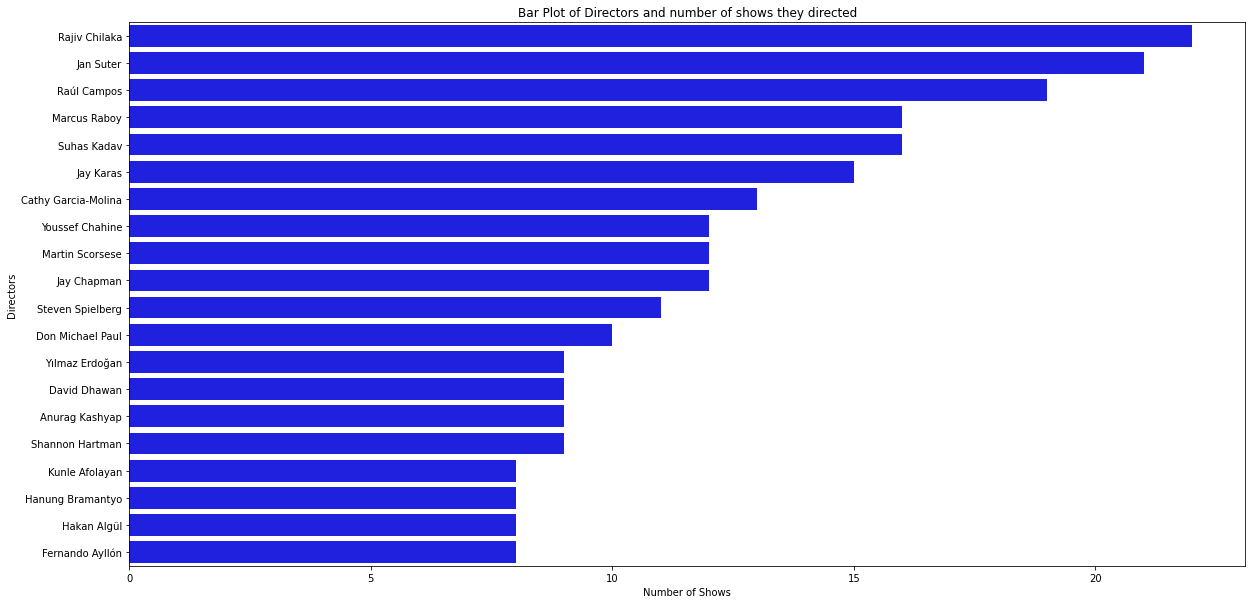

,Director,title
3749,Rajiv Chilaka,22
1906,Jan Suter,21
3800,Raúl Campos,19
2866,Marcus Raboy,16
4457,Suhas Kadav,16
1954,Jay Karas,15
755,Cathy Garcia-Molina,13
4942,Youssef Chahine,12
2945,Martin Scorsese,12
1951,Jay Chapman,12


In [3]:
temp = df.groupby(["Director"]).agg({"title": "nunique"}).reset_index().sort_values(by="title", ascending=False)[1:21]

plt.figure(figsize=(20, 10))
sns.barplot(x = temp["title"], y = temp["Director"], color="blue")

plt.xlabel("Number of Shows")
plt.ylabel("Directors")
plt.title("Bar Plot of Directors and number of shows they directed")

plt.show()
temp

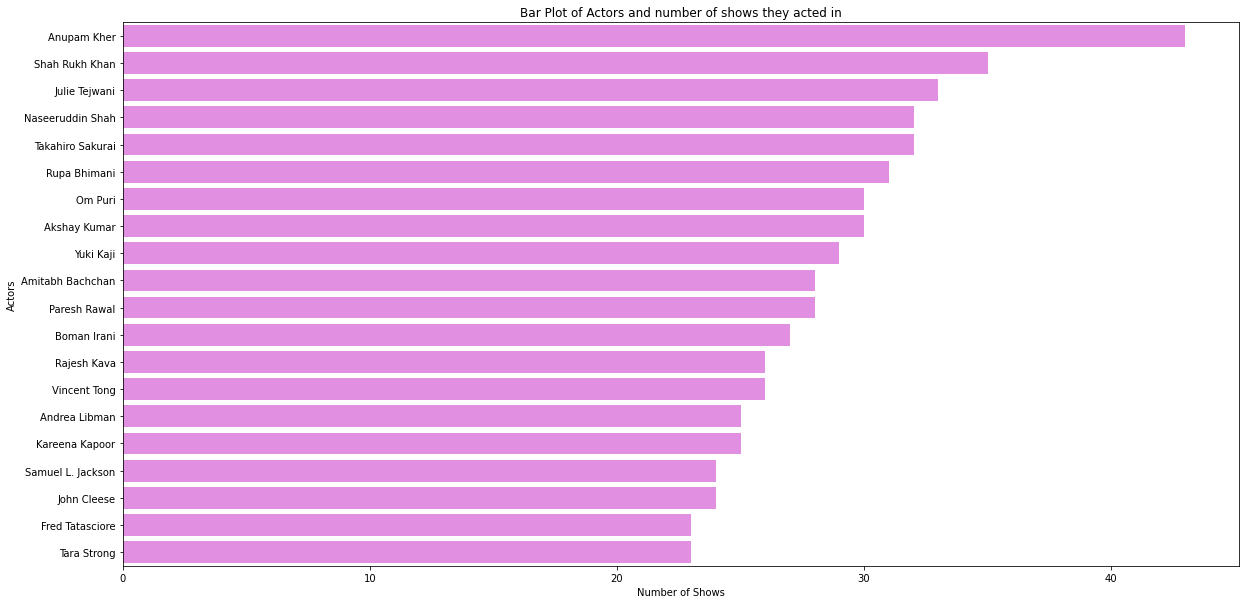

,Cast,title
2833,Anupam Kher,43
30489,Shah Rukh Khan,35
16697,Julie Tejwani,33
24215,Naseeruddin Shah,32
32591,Takahiro Sakurai,32
28974,Rupa Bhimani,31
25424,Om Puri,30
846,Akshay Kumar,30
35881,Yuki Kaji,29
1774,Amitabh Bachchan,28


In [4]:
temp = df.groupby(["Cast"]).agg({"title": "nunique"}).reset_index().sort_values(by="title", ascending=False)[1:21]

plt.figure(figsize=(20, 10))
sns.barplot(x = temp["title"], y = temp["Cast"], color="violet")

plt.xlabel("Number of Shows")
plt.ylabel("Actors")
plt.title("Bar Plot of Actors and number of shows they acted in")

plt.show()
temp

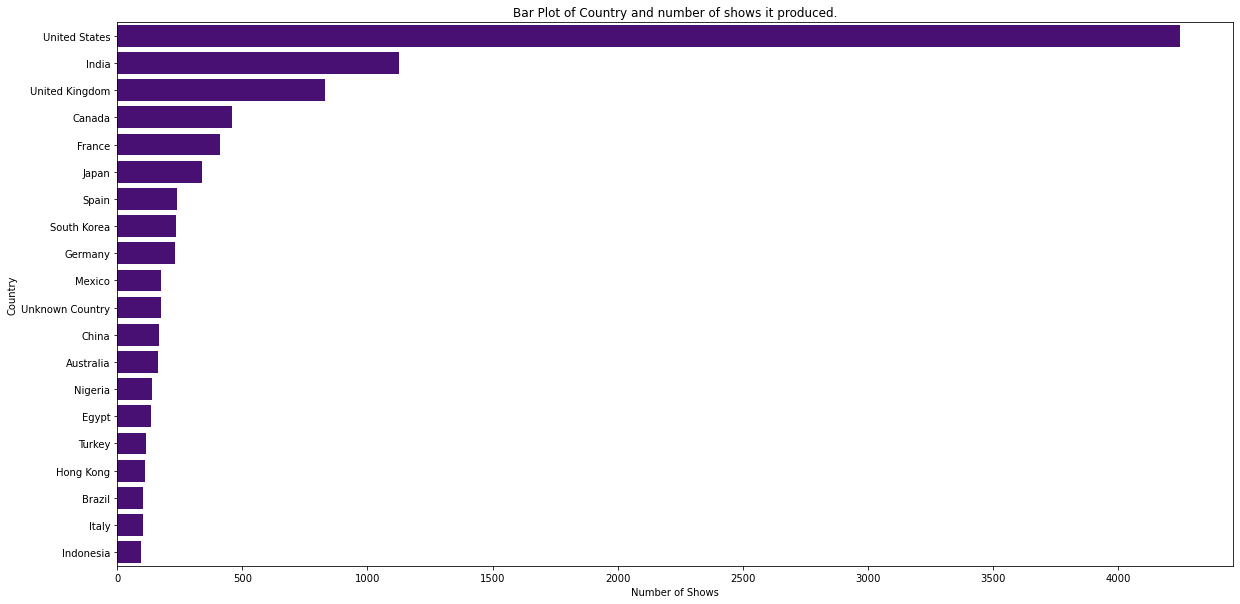

,Country,title
115,United States,4247
45,India,1126
114,United Kingdom,831
20,Canada,460
36,France,409
53,Japan,338
102,Spain,239
100,South Korea,235
38,Germany,231
67,Mexico,175


In [5]:
temp = df.groupby(["Country"]).agg({"title": "nunique"}).reset_index().sort_values(by="title", ascending=False)[:20]

plt.figure(figsize=(20, 10))
sns.barplot(x = temp["title"], y = temp["Country"], color="indigo")

plt.xlabel("Number of Shows")
plt.ylabel("Country")
plt.title("Bar Plot of Country and number of shows it produced.")

plt.show()
temp

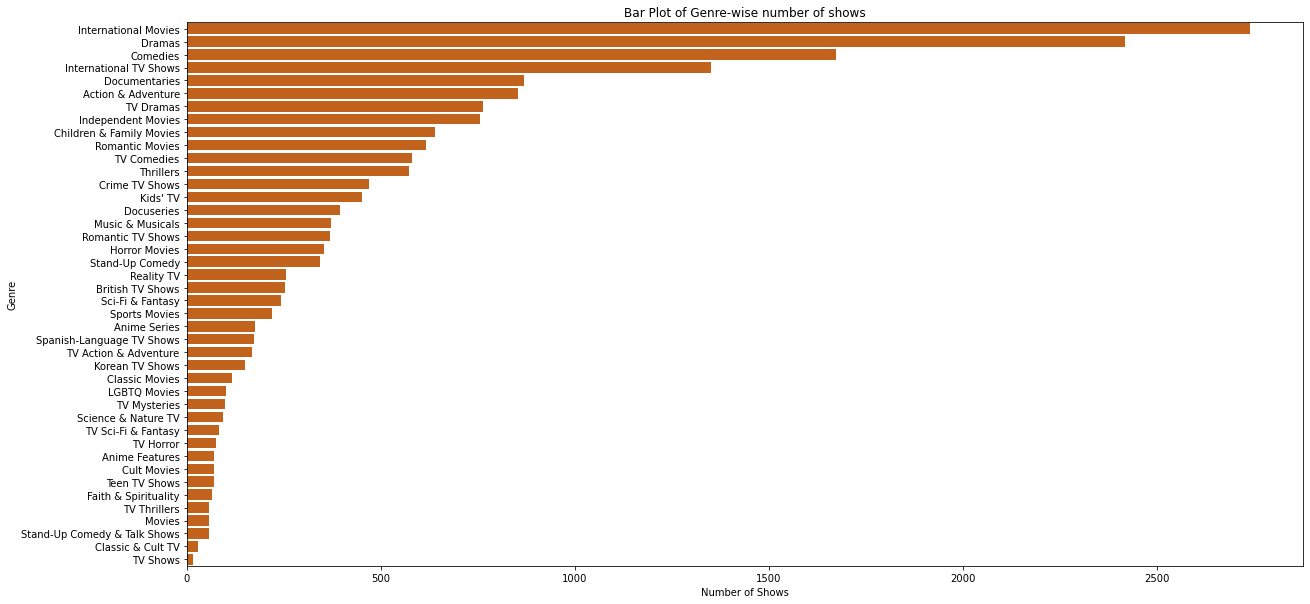

,Genre,title
16,International Movies,2738
12,Dramas,2418
7,Comedies,1673
17,International TV Shows,1351
10,Documentaries,869
0,Action & Adventure,854
34,TV Dramas,763
15,Independent Movies,756
4,Children & Family Movies,639
24,Romantic Movies,615


In [50]:
temp = df.groupby(["Genre"]).agg({"title": "nunique"}).reset_index().sort_values(by="title", ascending=False)

plt.figure(figsize=(20, 10))
sns.barplot(x = temp["title"], y = temp["Genre"], color="#DC5F00")

plt.xlabel("Number of Shows")
plt.ylabel("Genre")
plt.title("Bar Plot of Genre-wise number of shows")

plt.show()
temp

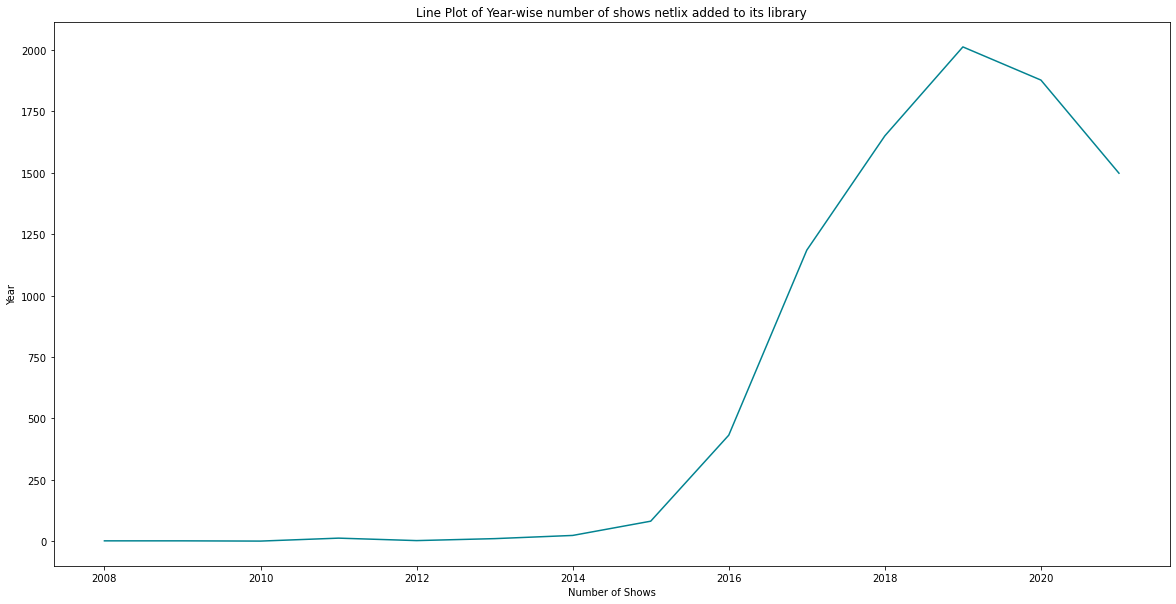

,year_added,title
0,2008,2
1,2009,2
2,2010,1
3,2011,13
4,2012,3
5,2013,11
6,2014,24
7,2015,82
8,2016,432
9,2017,1185


In [46]:
temp = df.groupby(["year_added"]).agg({"title": "nunique"}).reset_index()

plt.figure(figsize=(20, 10))
sns.lineplot(y = temp["title"], x = temp["year_added"], color="#028391")

plt.xlabel("Number of Shows")
plt.ylabel("Year")
plt.title("Line Plot of Year-wise number of shows netlix added to its library")

plt.show()
temp

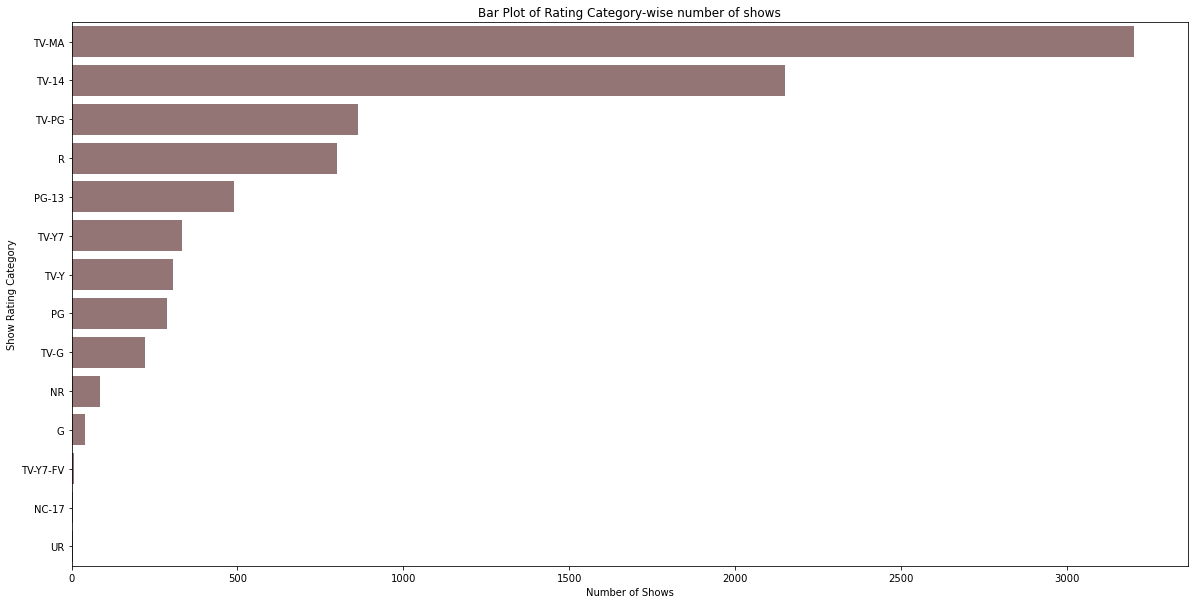

,rating,title
8,TV-MA,3204
6,TV-14,2151
9,TV-PG,863
5,R,799
4,PG-13,490
11,TV-Y7,334
10,TV-Y,305
3,PG,287
7,TV-G,220
2,NR,87


In [47]:
temp = df.groupby(["rating"]).agg({"title": "nunique"}).reset_index().sort_values(by="title", ascending=False)

plt.figure(figsize=(20, 10))
sns.barplot(x = temp["title"], y = temp["rating"], color="#987070")

plt.xlabel("Number of Shows")
plt.ylabel("Show Rating Category")
plt.title("Bar Plot of Rating Category-wise number of shows")

plt.show()
temp

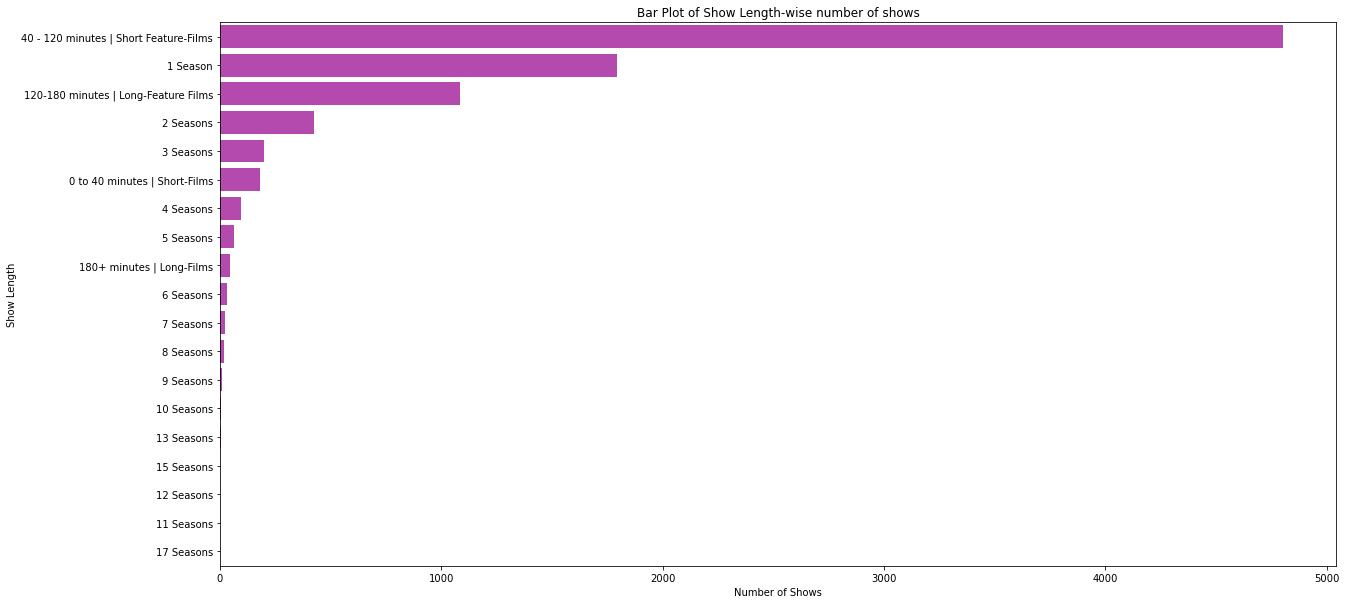

,duration,title
13,40 - 120 minutes | Short Feature-Films,4802
1,1 Season,1793
5,120-180 minutes | Long-Feature Films,1084
10,2 Seasons,425
11,3 Seasons,199
0,0 to 40 minutes | Short-Films,183
12,4 Seasons,95
14,5 Seasons,65
9,180+ minutes | Long-Films,47
15,6 Seasons,33


In [48]:
temp = df.groupby(["duration"]).agg({"title": "nunique"}).reset_index().sort_values(by="title", ascending=False)

plt.figure(figsize=(20, 10))
sns.barplot(x = temp["title"], y = temp["duration"], color="#C738BD")

plt.xlabel("Number of Shows")
plt.ylabel("Show Length")
plt.title("Bar Plot of Show Length-wise number of shows")

plt.show()
temp

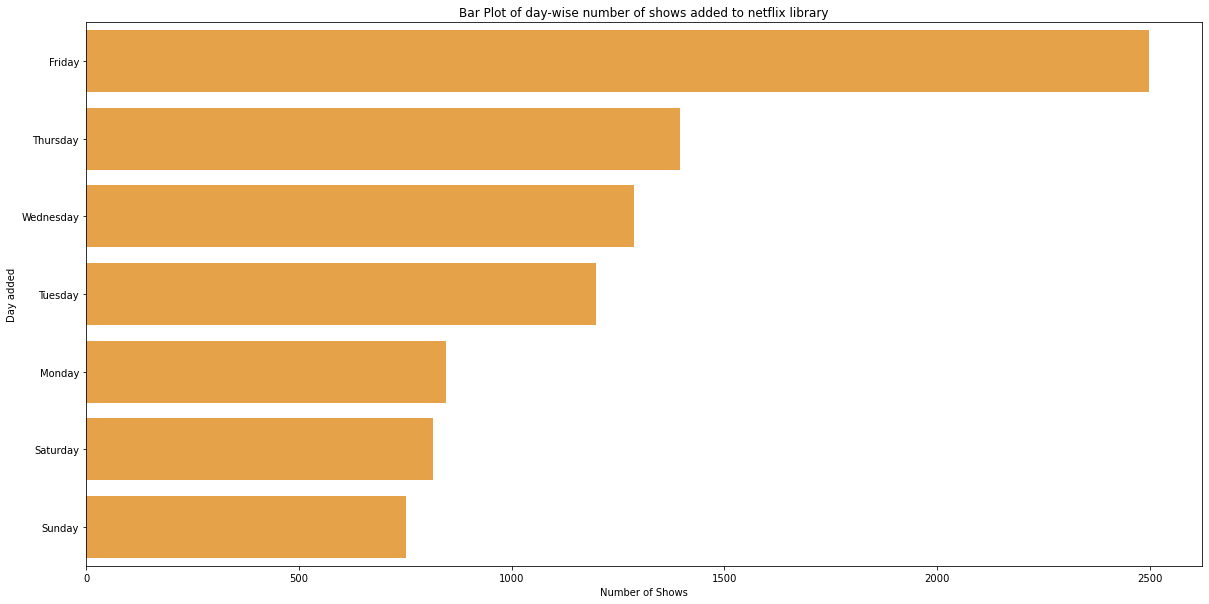

,day_name_added,title
0,Friday,2498
4,Thursday,1397
6,Wednesday,1287
5,Tuesday,1199
1,Monday,846
2,Saturday,816
3,Sunday,751


In [49]:
temp = df.groupby(["day_name_added"]).agg({"title": "nunique"}).reset_index().sort_values(by="title", ascending=False)

plt.figure(figsize=(20, 10))
sns.barplot(x = temp["title"], y = temp["day_name_added"], color="#FFA62F")

plt.xlabel("Number of Shows")
plt.ylabel("Day added")
plt.title("Bar Plot of day-wise number of shows added to netflix library")

plt.show()
temp

## TV Shows vs Movies Analysis

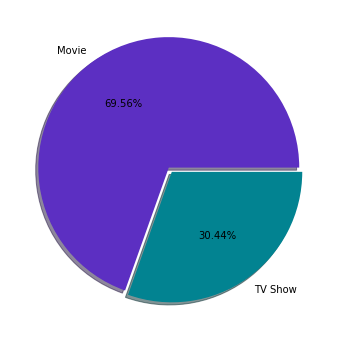

,type,title
0,Movie,6115
1,TV Show,2676


In [40]:
temp = df.groupby(["type"]).agg({"title": "nunique"}).reset_index().sort_values(by="title", ascending=False)

plt.figure(figsize=(6,6))
plt.pie(temp["title"], labels=temp["type"], autopct="%.2f%%", colors=["#5C2FC2", "#028391"], explode=(0.02, 0.02), shadow=True)

plt.show()
temp

In [13]:
df_movie = df.loc[df['type'] == 'Movie']
df_show = df.loc[df['type'] == 'TV Show']

### TV Shows Analysis

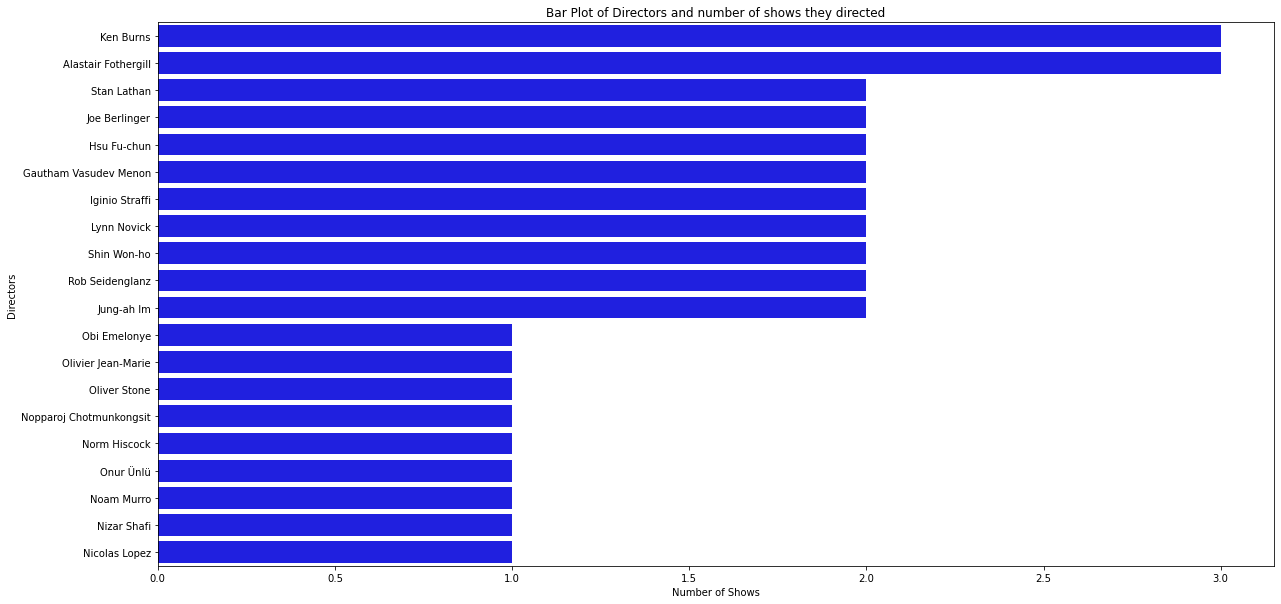

,Director,title
146,Ken Burns,3
8,Alastair Fothergill,3
259,Stan Lathan,2
128,Joe Berlinger,2
100,Hsu Fu-chun,2
84,Gautham Vasudev Menon,2
103,Iginio Straffi,2
168,Lynn Novick,2
251,Shin Won-ho,2
235,Rob Seidenglanz,2


In [14]:
temp = df_show.groupby(["Director"]).agg({"title": "nunique"}).reset_index().sort_values(by="title", ascending=False)[1:21]

plt.figure(figsize=(20, 10))
sns.barplot(x = temp["title"], y = temp["Director"], color="blue")

plt.xlabel("Number of Shows")
plt.ylabel("Directors")
plt.title("Bar Plot of Directors and number of shows they directed")

plt.show()
temp

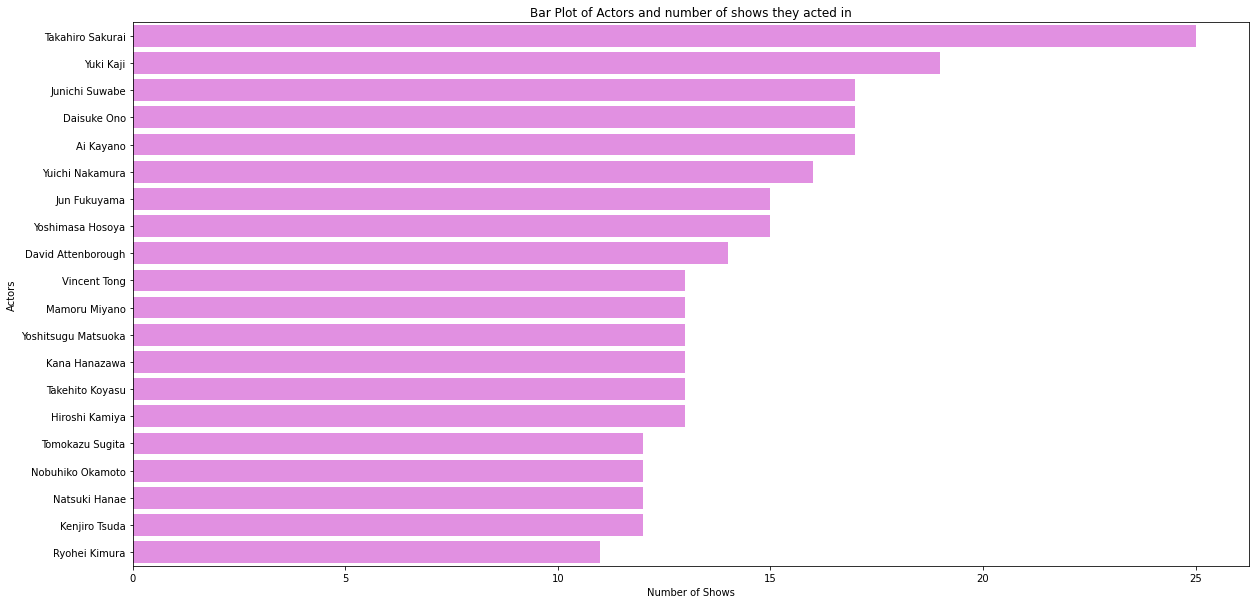

,Cast,title
13230,Takahiro Sakurai,25
14581,Yuki Kaji,19
6804,Junichi Suwabe,17
2874,Daisuke Ono,17
252,Ai Kayano,17
14565,Yuichi Nakamura,16
6761,Jun Fukuyama,15
14497,Yoshimasa Hosoya,15
3127,David Attenborough,14
14050,Vincent Tong,13


In [15]:
temp = df_show.groupby(["Cast"]).agg({"title": "nunique"}).reset_index().sort_values(by="title", ascending=False)[1:21]

plt.figure(figsize=(20, 10))
sns.barplot(x = temp["title"], y = temp["Cast"], color="violet")

plt.xlabel("Number of Shows")
plt.ylabel("Actors")
plt.title("Bar Plot of Actors and number of shows they acted in")

plt.show()
temp

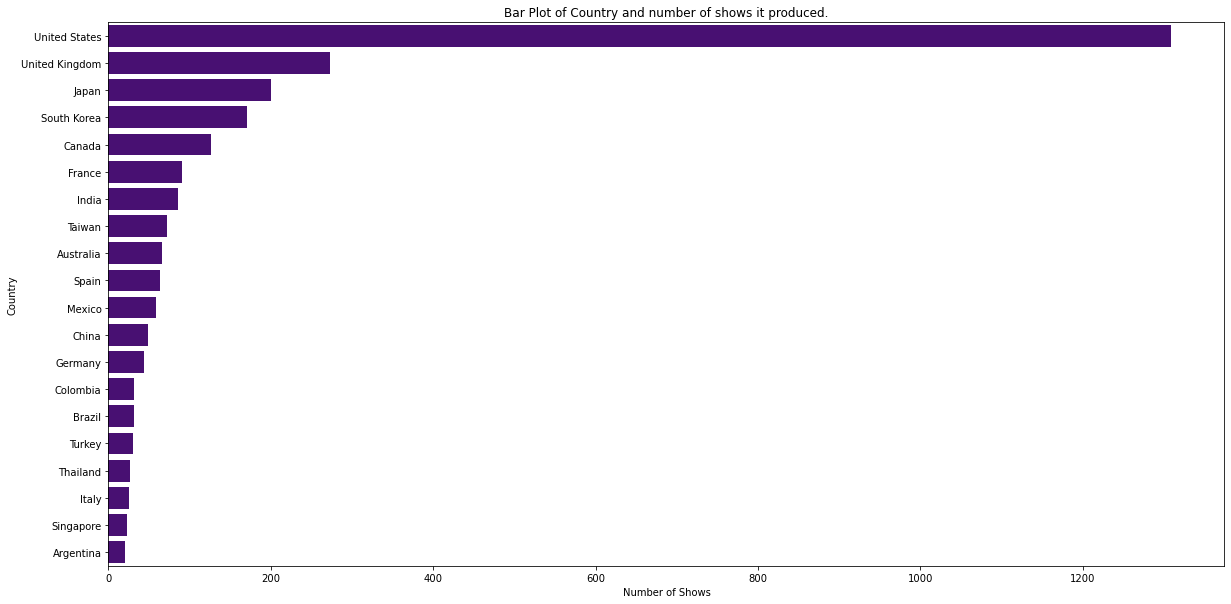

,Country,title
63,United States,1309
62,United Kingdom,273
30,Japan,200
52,South Korea,171
8,Canada,126
19,France,91
25,India,86
57,Taiwan,72
2,Australia,66
53,Spain,63


In [16]:
temp = df_show.groupby(["Country"]).agg({"title": "nunique"}).reset_index().sort_values(by="title", ascending=False)[:20]

plt.figure(figsize=(20, 10))
sns.barplot(x = temp["title"], y = temp["Country"], color="indigo")

plt.xlabel("Number of Shows")
plt.ylabel("Country")
plt.title("Bar Plot of Country and number of shows it produced.")

plt.show()
temp

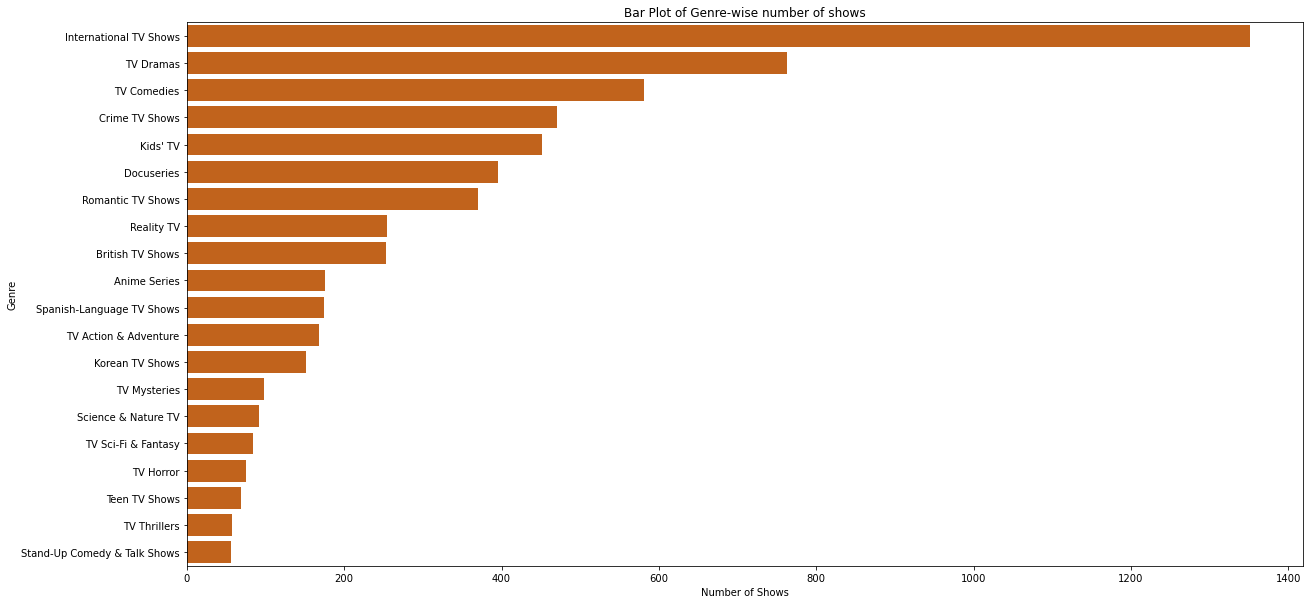

,Genre,title
5,International TV Shows,1351
15,TV Dramas,763
14,TV Comedies,581
3,Crime TV Shows,470
6,Kids' TV,451
4,Docuseries,395
9,Romantic TV Shows,370
8,Reality TV,255
1,British TV Shows,253
0,Anime Series,176


In [17]:
temp = df_show.groupby(["Genre"]).agg({"title": "nunique"}).reset_index().sort_values(by="title", ascending=False)

plt.figure(figsize=(20, 10))
sns.barplot(x = temp["title"], y = temp["Genre"], color="#DC5F00")

plt.xlabel("Number of Shows")
plt.ylabel("Genre")
plt.title("Bar Plot of Genre-wise number of shows")

plt.show()
temp

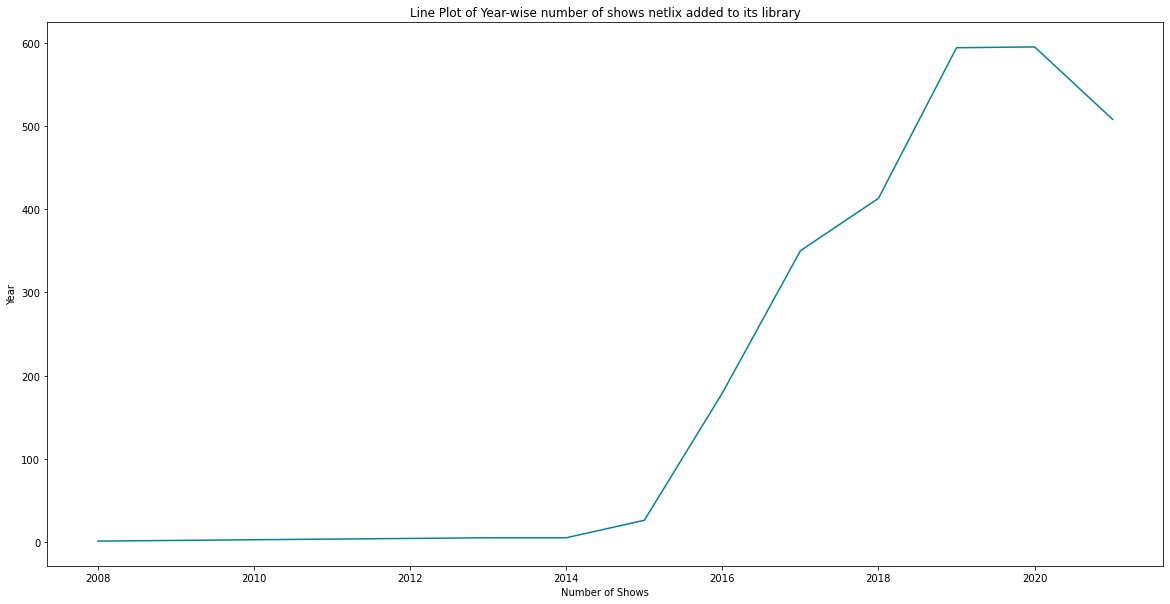

,year_added,title
0,2008,1
1,2013,5
2,2014,5
3,2015,26
4,2016,179
5,2017,350
6,2018,413
7,2019,594
8,2020,595
9,2021,508


In [18]:
temp = df_show.groupby(["year_added"]).agg({"title": "nunique"}).reset_index()

plt.figure(figsize=(20, 10))
sns.lineplot(y = temp["title"], x = temp["year_added"], color="#028391")

plt.xlabel("Number of Shows")
plt.ylabel("Year")
plt.title("Line Plot of Year-wise number of shows netlix added to its library")

plt.show()
temp

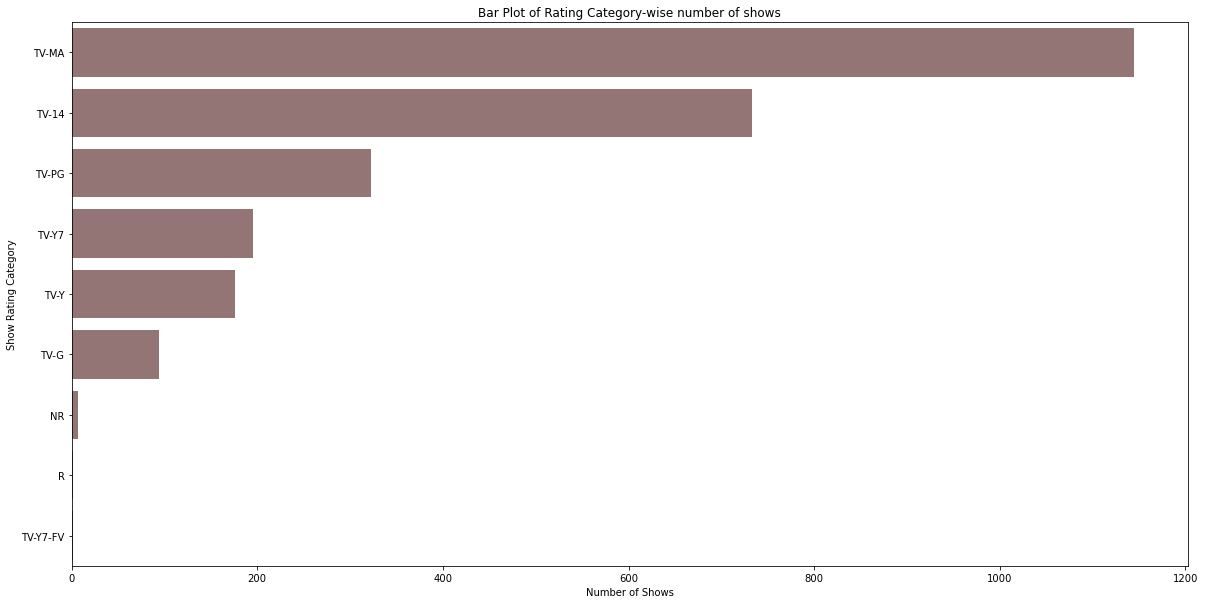

,rating,title
4,TV-MA,1145
2,TV-14,733
5,TV-PG,323
7,TV-Y7,195
6,TV-Y,176
3,TV-G,94
0,NR,7
1,R,2
8,TV-Y7-FV,1


In [19]:
temp = df_show.groupby(["rating"]).agg({"title": "nunique"}).reset_index().sort_values(by="title", ascending=False)

plt.figure(figsize=(20, 10))
sns.barplot(x = temp["title"], y = temp["rating"], color="#987070")

plt.xlabel("Number of Shows")
plt.ylabel("Show Rating Category")
plt.title("Bar Plot of Rating Category-wise number of shows")

plt.show()
temp

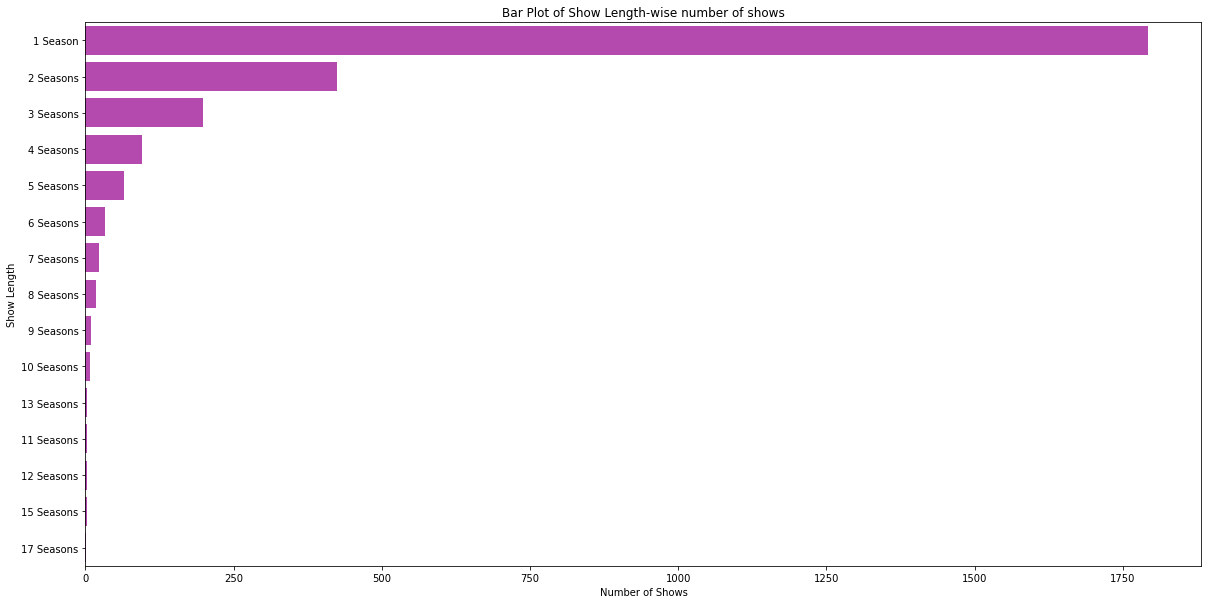

,duration,title
0,1 Season,1793
7,2 Seasons,425
8,3 Seasons,199
9,4 Seasons,95
10,5 Seasons,65
11,6 Seasons,33
12,7 Seasons,23
13,8 Seasons,17
14,9 Seasons,9
1,10 Seasons,7


In [20]:
temp = df_show.groupby(["duration"]).agg({"title": "nunique"}).reset_index().sort_values(by="title", ascending=False)

plt.figure(figsize=(20, 10))
sns.barplot(x = temp["title"], y = temp["duration"], color="#C738BD")

plt.xlabel("Number of Shows")
plt.ylabel("Show Length")
plt.title("Bar Plot of Show Length-wise number of shows")

plt.show()
temp

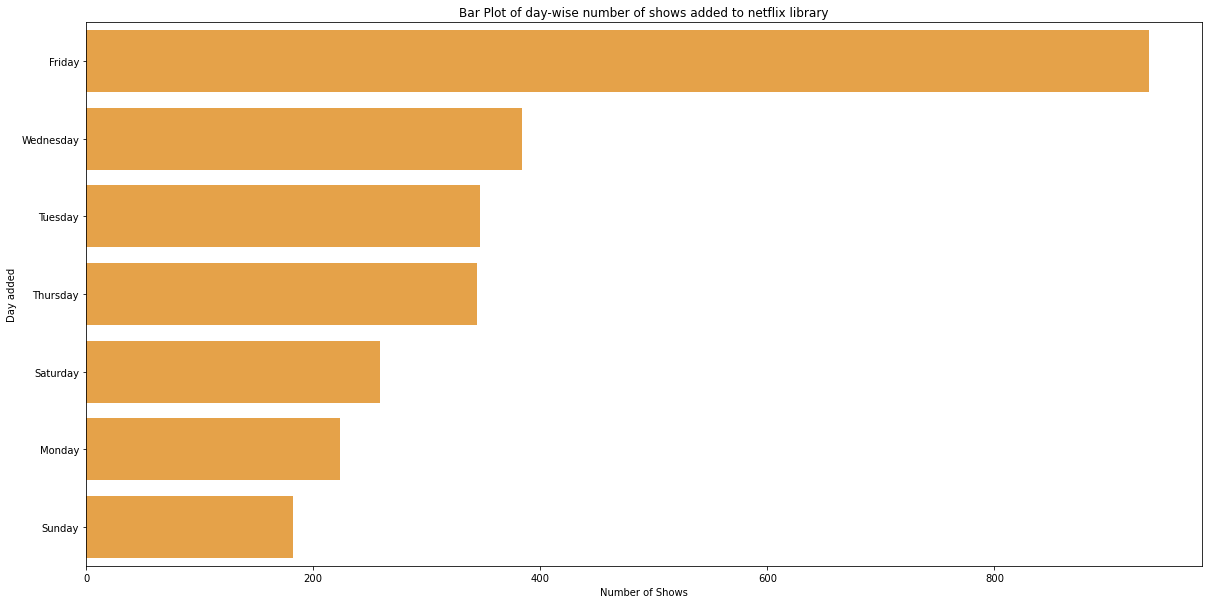

,day_name_added,title
0,Friday,936
6,Wednesday,384
5,Tuesday,347
4,Thursday,344
2,Saturday,259
1,Monday,224
3,Sunday,182


In [21]:
temp = df_show.groupby(["day_name_added"]).agg({"title": "nunique"}).reset_index().sort_values(by="title", ascending=False)

plt.figure(figsize=(20, 10))
sns.barplot(x = temp["title"], y = temp["day_name_added"], color="#FFA62F")

plt.xlabel("Number of Shows")
plt.ylabel("Day added")
plt.title("Bar Plot of day-wise number of shows added to netflix library")

plt.show()
temp

### Movies Analysis

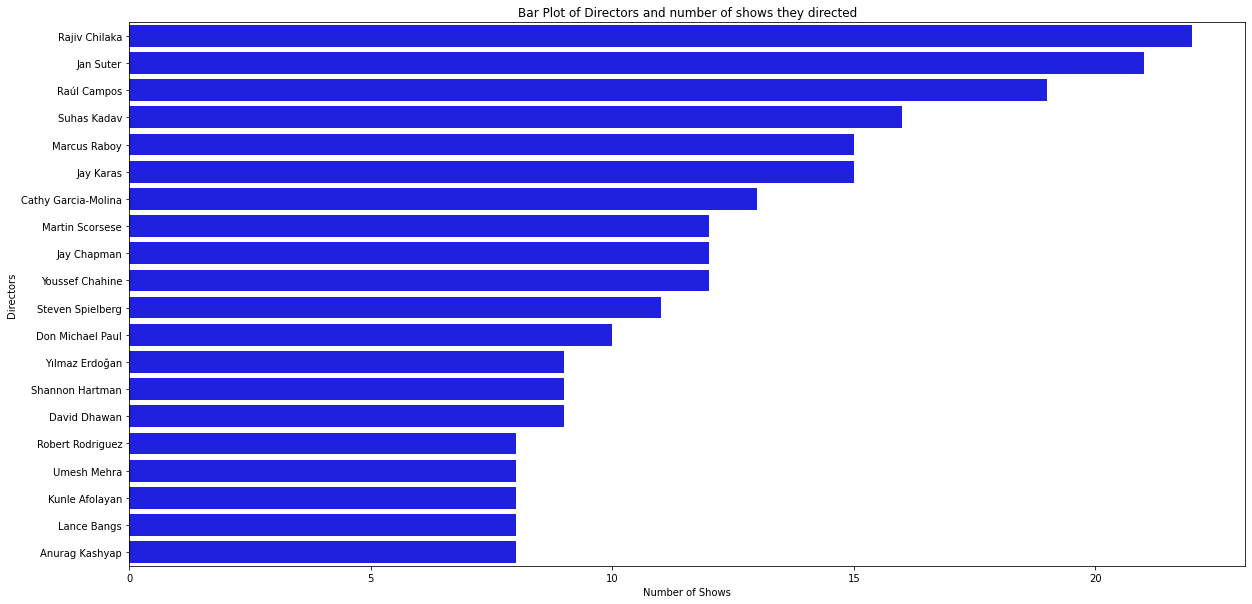

,Director,title
3582,Rajiv Chilaka,22
1817,Jan Suter,21
3633,Raúl Campos,19
4261,Suhas Kadav,16
2739,Marcus Raboy,15
1862,Jay Karas,15
727,Cathy Garcia-Molina,13
2815,Martin Scorsese,12
1859,Jay Chapman,12
4726,Youssef Chahine,12


In [22]:
temp = df_movie.groupby(["Director"]).agg({"title": "nunique"}).reset_index().sort_values(by="title", ascending=False)[1:21]

plt.figure(figsize=(20, 10))
sns.barplot(x = temp["title"], y = temp["Director"], color="blue")

plt.xlabel("Number of Shows")
plt.ylabel("Directors")
plt.title("Bar Plot of Directors and number of shows they directed")

plt.show()
temp

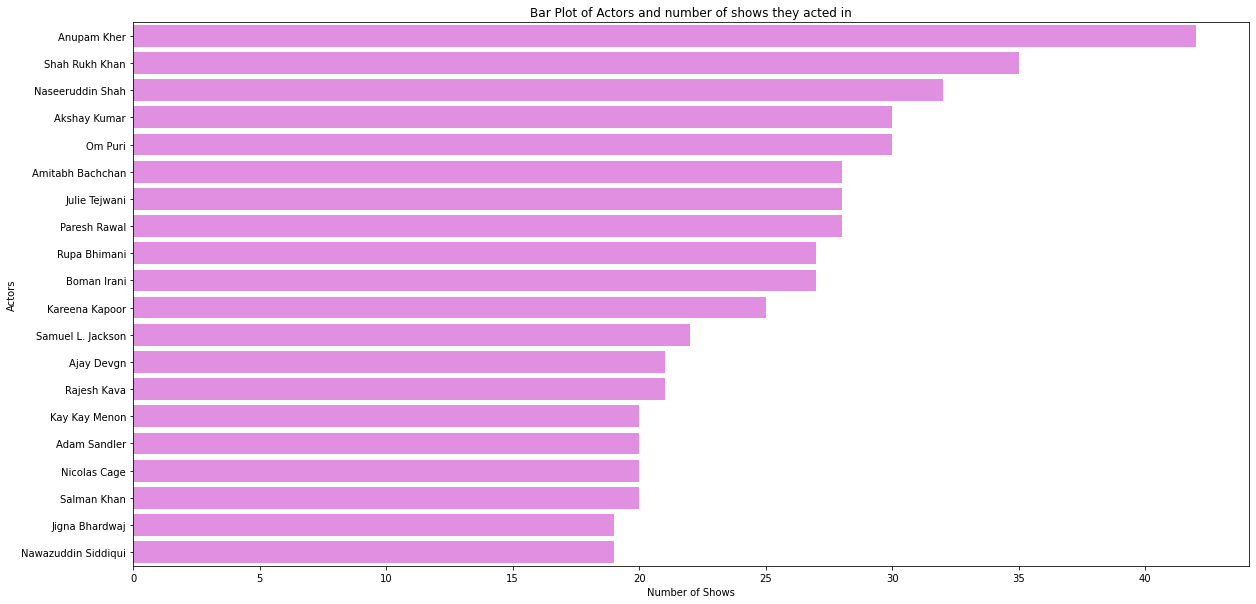

,Cast,title
2105,Anupam Kher,42
21781,Shah Rukh Khan,35
17193,Naseeruddin Shah,32
638,Akshay Kumar,30
18064,Om Puri,30
1313,Amitabh Bachchan,28
12031,Julie Tejwani,28
18329,Paresh Rawal,28
20692,Rupa Bhimani,27
3354,Boman Irani,27


In [23]:
temp = df_movie.groupby(["Cast"]).agg({"title": "nunique"}).reset_index().sort_values(by="title", ascending=False)[1:21]

plt.figure(figsize=(20, 10))
sns.barplot(x = temp["title"], y = temp["Cast"], color="violet")

plt.xlabel("Number of Shows")
plt.ylabel("Actors")
plt.title("Bar Plot of Actors and number of shows they acted in")

plt.show()
temp

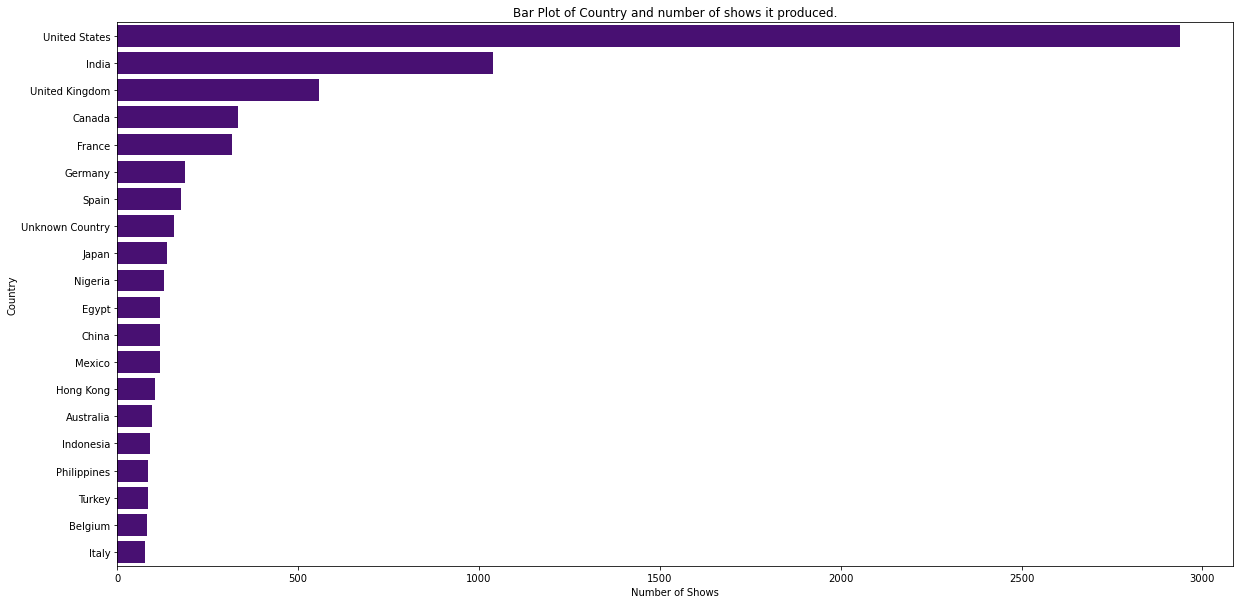

,Country,title
111,United States,2938
42,India,1040
110,United Kingdom,558
18,Canada,334
33,France,318
35,Germany,187
98,Spain,176
112,Unknown Country,156
50,Japan,138
74,Nigeria,129


In [24]:
temp = df_movie.groupby(["Country"]).agg({"title": "nunique"}).reset_index().sort_values(by="title", ascending=False)[:20]

plt.figure(figsize=(20, 10))
sns.barplot(x = temp["title"], y = temp["Country"], color="indigo")

plt.xlabel("Number of Shows")
plt.ylabel("Country")
plt.title("Bar Plot of Country and number of shows it produced.")

plt.show()
temp

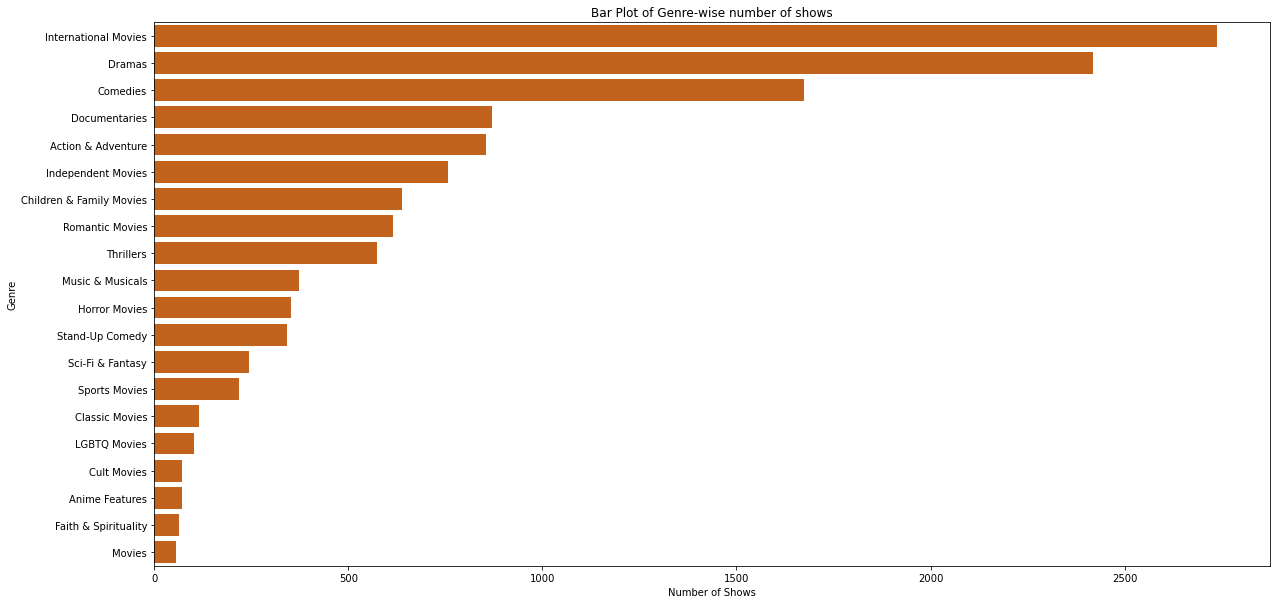

,Genre,title
11,International Movies,2738
7,Dramas,2418
4,Comedies,1673
6,Documentaries,869
0,Action & Adventure,854
10,Independent Movies,756
2,Children & Family Movies,639
15,Romantic Movies,615
19,Thrillers,573
14,Music & Musicals,372


In [25]:
temp = df_movie.groupby(["Genre"]).agg({"title": "nunique"}).reset_index().sort_values(by="title", ascending=False)

plt.figure(figsize=(20, 10))
sns.barplot(x = temp["title"], y = temp["Genre"], color="#DC5F00")

plt.xlabel("Number of Shows")
plt.ylabel("Genre")
plt.title("Bar Plot of Genre-wise number of shows")

plt.show()
temp

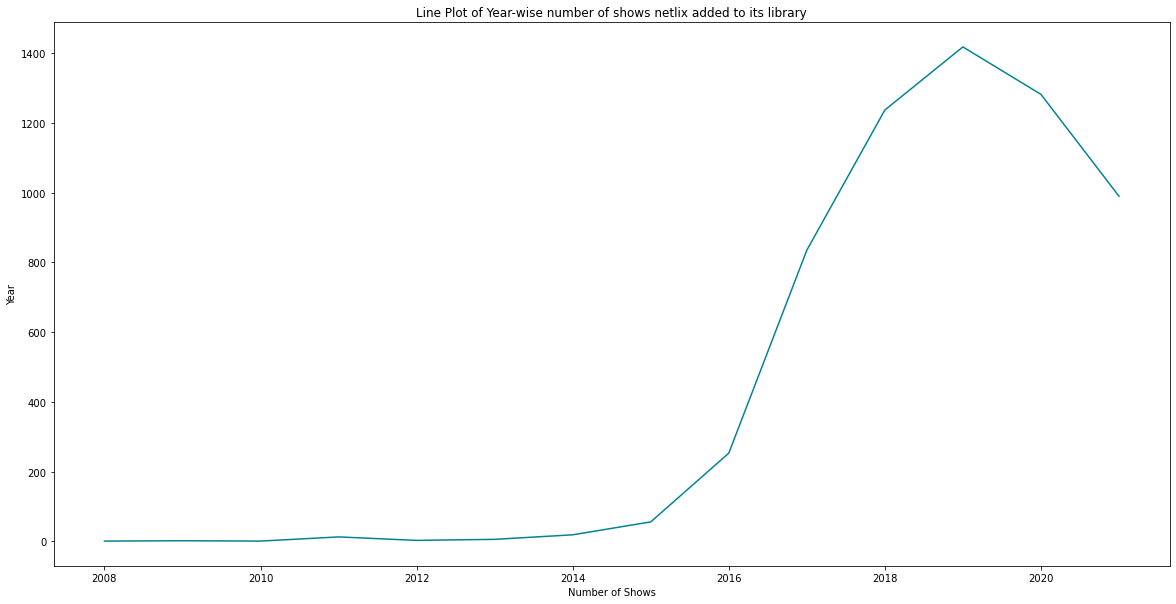

,year_added,title
0,2008,1
1,2009,2
2,2010,1
3,2011,13
4,2012,3
5,2013,6
6,2014,19
7,2015,56
8,2016,253
9,2017,835


In [26]:
temp = df_movie.groupby(["year_added"]).agg({"title": "nunique"}).reset_index()

plt.figure(figsize=(20, 10))
sns.lineplot(y = temp["title"], x = temp["year_added"], color="#028391")

plt.xlabel("Number of Shows")
plt.ylabel("Year")
plt.title("Line Plot of Year-wise number of shows netlix added to its library")

plt.show()
temp

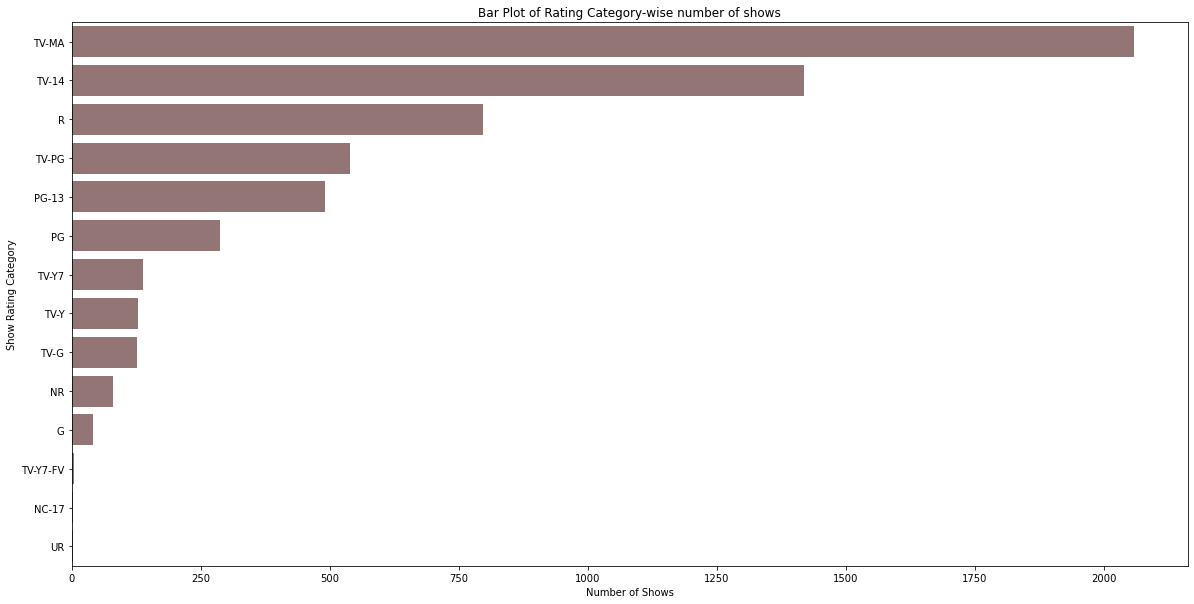

,rating,title
8,TV-MA,2059
6,TV-14,1418
5,R,797
9,TV-PG,540
4,PG-13,490
3,PG,287
11,TV-Y7,139
10,TV-Y,129
7,TV-G,126
2,NR,80


In [27]:
temp = df_movie.groupby(["rating"]).agg({"title": "nunique"}).reset_index().sort_values(by="title", ascending=False)

plt.figure(figsize=(20, 10))
sns.barplot(x = temp["title"], y = temp["rating"], color="#987070")

plt.xlabel("Number of Shows")
plt.ylabel("Show Rating Category")
plt.title("Bar Plot of Rating Category-wise number of shows")

plt.show()
temp

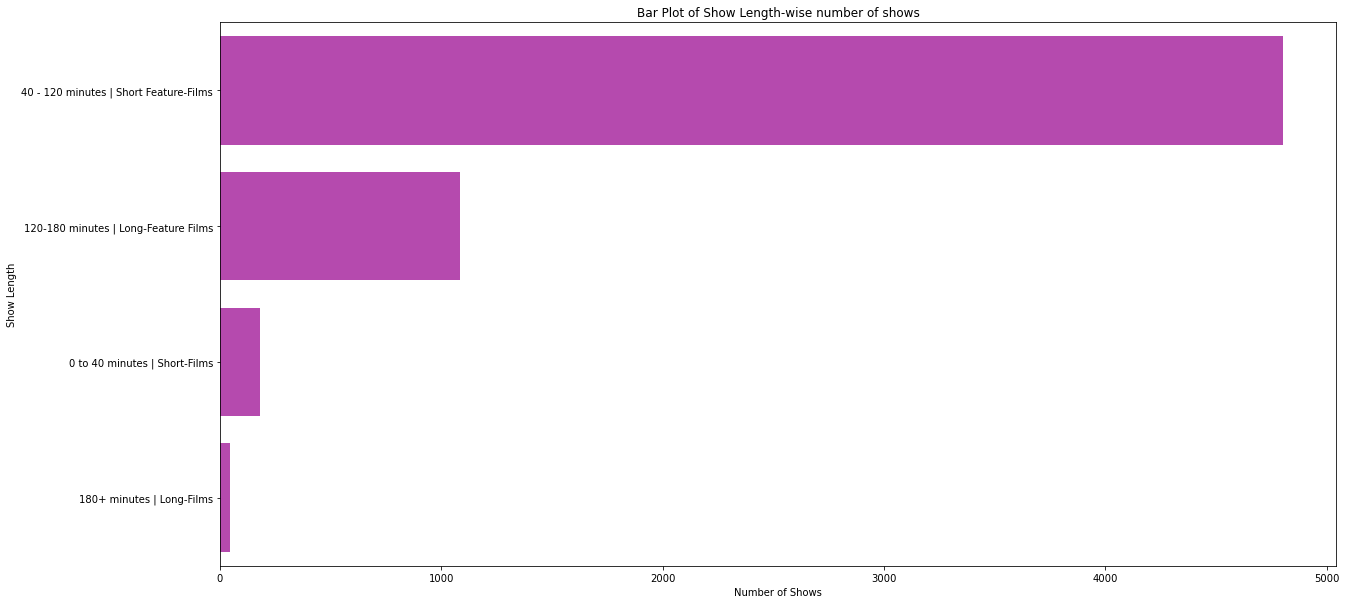

,duration,title
3,40 - 120 minutes | Short Feature-Films,4802
1,120-180 minutes | Long-Feature Films,1084
0,0 to 40 minutes | Short-Films,183
2,180+ minutes | Long-Films,47


In [28]:
temp = df_movie.groupby(["duration"]).agg({"title": "nunique"}).reset_index().sort_values(by="title", ascending=False)

plt.figure(figsize=(20, 10))
sns.barplot(x = temp["title"], y = temp["duration"], color="#C738BD")

plt.xlabel("Number of Shows")
plt.ylabel("Show Length")
plt.title("Bar Plot of Show Length-wise number of shows")

plt.show()
temp

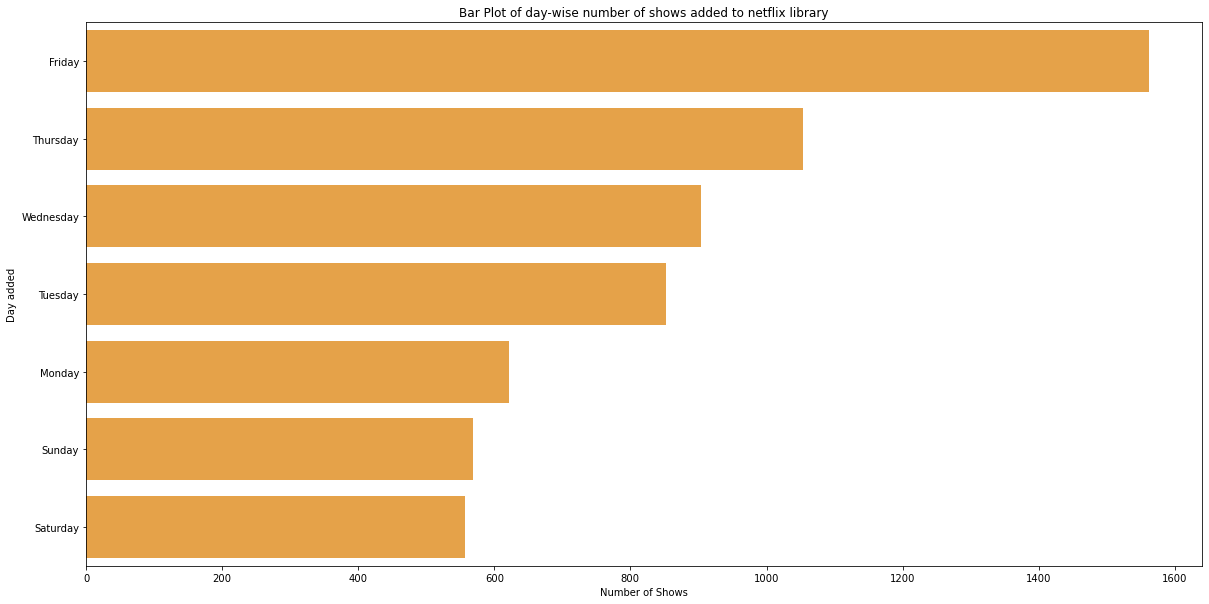

,day_name_added,title
0,Friday,1562
4,Thursday,1053
6,Wednesday,903
5,Tuesday,852
1,Monday,622
3,Sunday,569
2,Saturday,557


In [29]:
temp = df_movie.groupby(["day_name_added"]).agg({"title": "nunique"}).reset_index().sort_values(by="title", ascending=False)

plt.figure(figsize=(20, 10))
sns.barplot(x = temp["title"], y = temp["day_name_added"], color="#FFA62F")

plt.xlabel("Number of Shows")
plt.ylabel("Day added")
plt.title("Bar Plot of day-wise number of shows added to netflix library")

plt.show()
temp

### Miscellaneous Plots

No handles with labels found to put in legend.


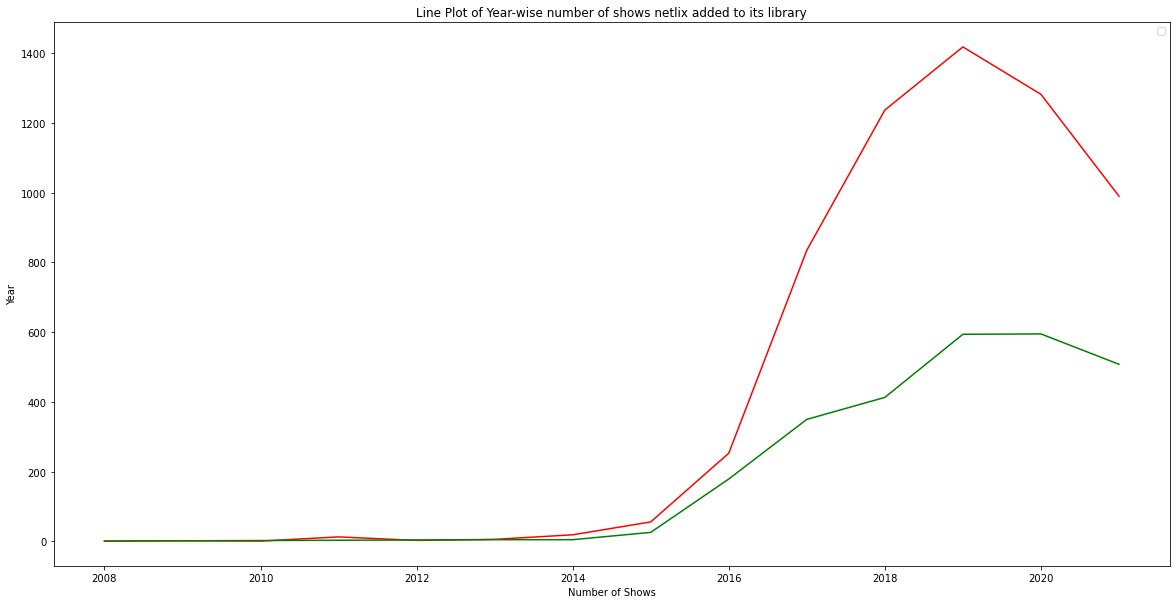

In [30]:
plt.figure(figsize=(20, 10))

temp = df_movie.groupby(["year_added"]).agg({"title": "nunique"}).reset_index()
sns.lineplot(y = temp["title"], x = temp["year_added"], color="red")

temp = df_show.groupby(["year_added"]).agg({"title": "nunique"}).reset_index()
sns.lineplot(y = temp["title"], x = temp["year_added"], color="green")

plt.xlabel("Number of Shows")
plt.ylabel("Year")
plt.title("Line Plot of Year-wise number of shows netlix added to its library")
plt.legend()
plt.show()

## Best Time to launch a show

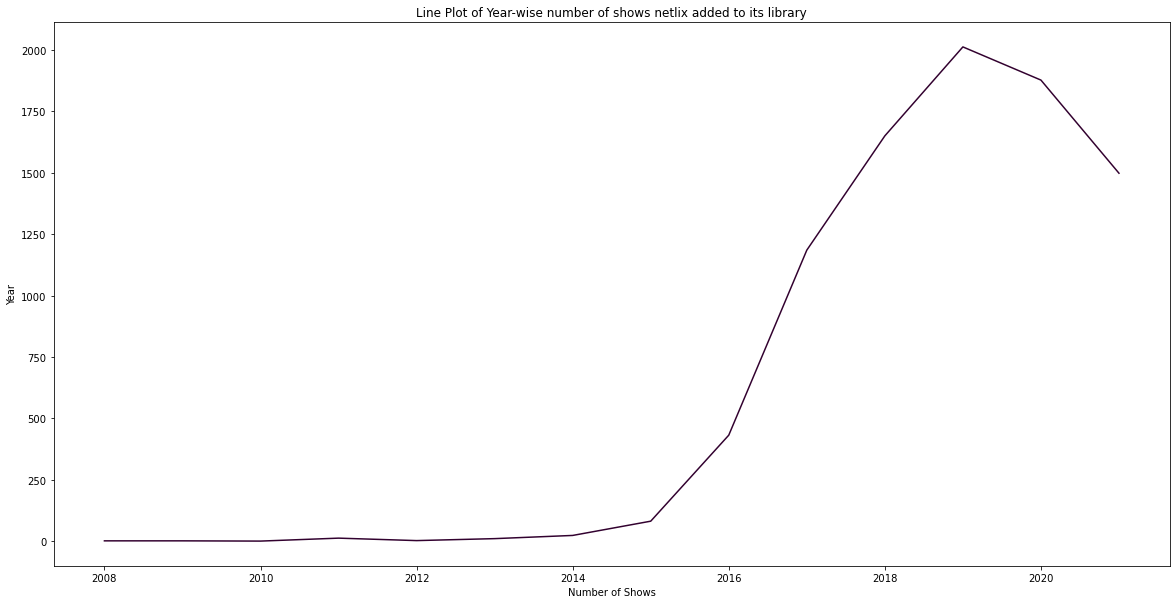

,year_added,title
0,2008,2
1,2009,2
2,2010,1
3,2011,13
4,2012,3
5,2013,11
6,2014,24
7,2015,82
8,2016,432
9,2017,1185


In [44]:
temp = df.groupby(["year_added"]).agg({"title": "nunique"}).reset_index()

plt.figure(figsize=(20, 10))
sns.lineplot(y = temp["title"], x = temp["year_added"], color="#32012F")

plt.xlabel("Number of Shows")
plt.ylabel("Year")
plt.title("Line Plot of Year-wise number of shows netlix added to its library")

plt.show()
temp

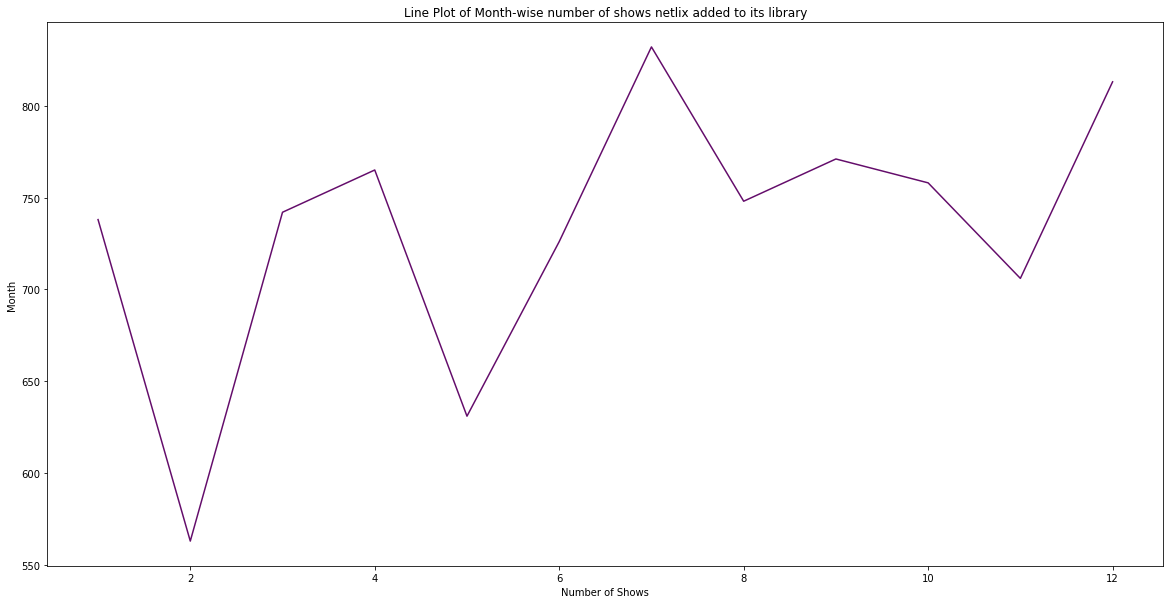

,month_added,title
0,1,738
1,2,563
2,3,742
3,4,765
4,5,631
5,6,726
6,7,832
7,8,748
8,9,771
9,10,758


In [43]:
temp = df.groupby(["month_added"]).agg({"title": "nunique"}).reset_index()

plt.figure(figsize=(20, 10))
sns.lineplot(y = temp["title"], x = temp["month_added"], color="#640D6B")

plt.xlabel("Number of Shows")
plt.ylabel("Month")
plt.title("Line Plot of Month-wise number of shows netlix added to its library")

plt.show()
temp

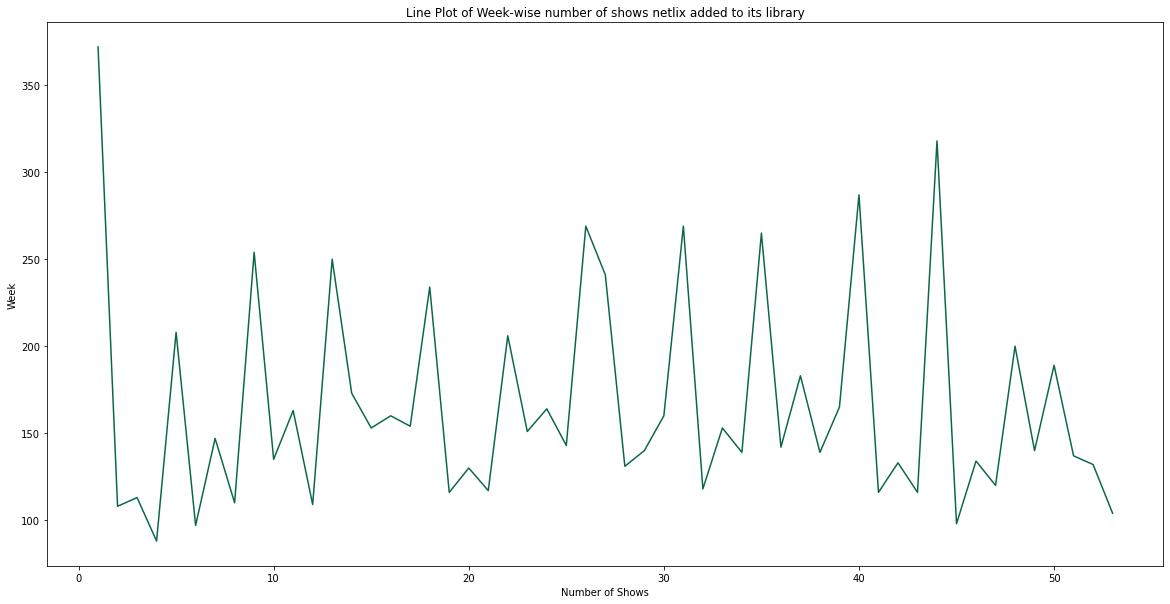

,week_added,title
0,1,372
1,2,108
2,3,113
3,4,88
4,5,208
5,6,97
6,7,147
7,8,110
8,9,254
9,10,135


In [42]:
temp = df.groupby(["week_added"]).agg({"title": "nunique"}).reset_index()

plt.figure(figsize=(20, 10))
sns.lineplot(y = temp["title"], x = temp["week_added"], color="#0A6847")

plt.xlabel("Number of Shows")
plt.ylabel("Week")
plt.title("Line Plot of Week-wise number of shows netlix added to its library")

plt.show()
temp

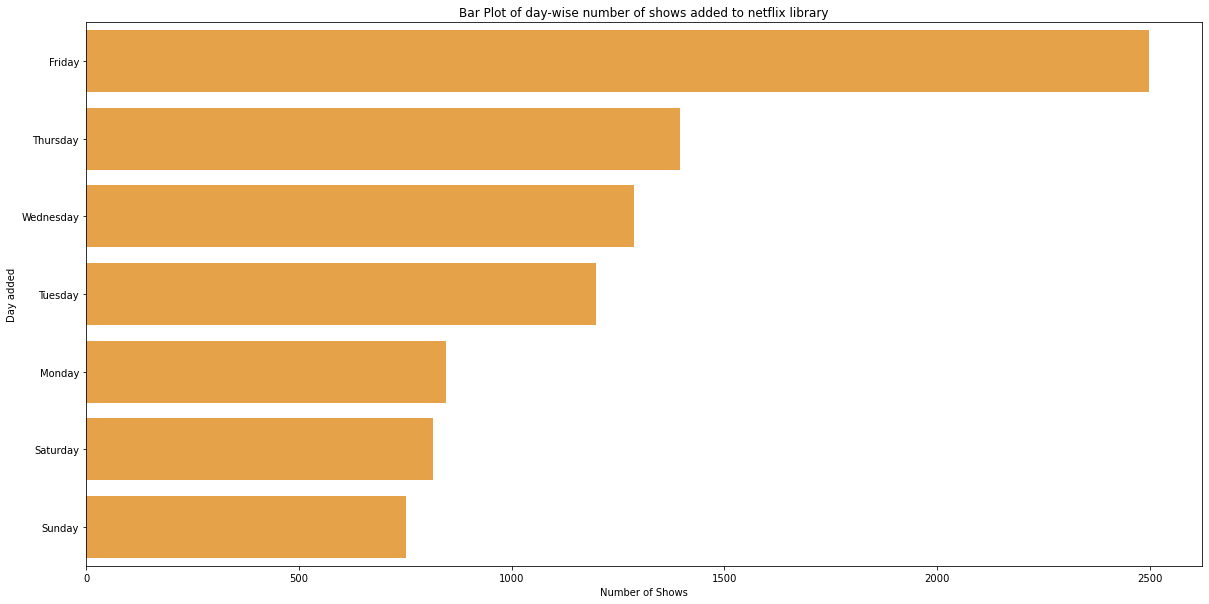

,day_name_added,title
0,Friday,2498
4,Thursday,1397
6,Wednesday,1287
5,Tuesday,1199
1,Monday,846
2,Saturday,816
3,Sunday,751


In [45]:
temp = df.groupby(["day_name_added"]).agg({"title": "nunique"}).reset_index().sort_values(by="title", ascending=False)

plt.figure(figsize=(20, 10))
sns.barplot(x = temp["title"], y = temp["day_name_added"], color="#FFA62F")

plt.xlabel("Number of Shows")
plt.ylabel("Day added")
plt.title("Bar Plot of day-wise number of shows added to netflix library")

plt.show()
temp

## Recent Years Analysis
Assuming recent years are year >= 2017.

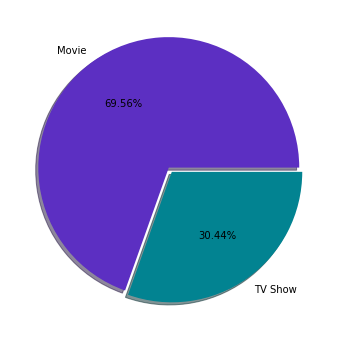

,type,title
0,Movie,6115
1,TV Show,2676


In [51]:
temp = df.groupby(["type"]).agg({"title": "nunique"}).reset_index().sort_values(by="title", ascending=False)

plt.figure(figsize=(6,6))
plt.pie(temp["title"], labels=temp["type"], autopct="%.2f%%", colors=["#5C2FC2", "#028391"], explode=(0.02, 0.02), shadow=True)

plt.show()
temp

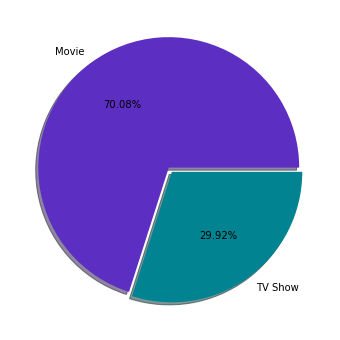

,type,title
0,Movie,5761
1,TV Show,2460


In [52]:
df_recent = df.loc[df['year_added'] >= 2017]

temp = df_recent.groupby(["type"]).agg({"title": "nunique"}).reset_index().sort_values(by="title", ascending=False)

plt.figure(figsize=(6,6))
plt.pie(temp["title"], labels=temp["type"], autopct="%.2f%%", colors=["#5C2FC2", "#028391"], explode=(0.02, 0.02), shadow=True)

plt.show()
temp

## Country-wise Analysis

In [ ]:
d